In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
from tqdm import tqdm

## 1번 + 2번 + 4번 연결

In [3]:
con = sqlite3.connect("lpoint.db", isolation_level=None) # lpoint db 생성 or 연결

df = pd.read_sql('''
SELECT P.cust, D.ma_fem_dv, D.ages, D.zon_hlv, P.rct_no, P.de_dt, P.chnl_dv, P.cop_c, P.pd_c, C.clac_hlv_nm, C.clac_mcls_nm, C.pd_nm, P.de_hr, P.buy_am, P.buy_ct
FROM PDDE AS P, DEMO AS D, PD_CLAC AS C
WHERE P.cust = D.cust AND P.pd_c = C.pd_c
GROUP BY P.cust, D.ma_fem_dv, D.ages, D.zon_hlv, P.rct_no, P.de_dt, P.chnl_dv, P.cop_c, P.pd_c, C.clac_hlv_nm, C.clac_mcls_nm, C.pd_nm, P.de_hr, P.buy_am, P.buy_ct;
''', con, index_col=None)

con.close()

In [4]:
df.columns = ['고객번호', '성별', '연령대', '거주지분류대코드', '영수증번호', '구매일자', '채널구분', '제휴사', '상품코드',
              '상품대분류명', '상품중분류명', '상품소분류명', '구매시간', '구매금액', '구매수량']

In [5]:
df['구매월'] = df['구매일자'].map(lambda x: str(x)[4:6]+'월')

In [6]:
df

,고객번호,성별,연령대,거주지분류대코드,영수증번호,구매일자,채널구분,제휴사,상품코드,상품대분류명,상품중분류명,상품소분류명,구매시간,구매금액,구매수량,구매월
0,M000034966,여성,40대,Z07,A01016688590,20210116,1,A01,PD0777,스포츠패션,남성스포츠화,남성런닝/트레이닝화,18,19000,1,01월
1,M000034966,여성,40대,Z07,A01016688590,20210116,1,A01,PD0777,스포츠패션,남성스포츠화,남성런닝/트레이닝화,18,59000,1,01월
2,M000034966,여성,40대,Z07,A01016688590,20210116,1,A01,PD0796,스포츠패션,스포츠잡화,스포츠아대/헤어밴드,18,100,1,01월
3,M000034966,여성,40대,Z07,A01016718167,20210116,1,A01,PD0816,스포츠패션,여성스포츠화,여성런닝/트레이닝화,18,62100,1,01월
4,M000034966,여성,40대,Z07,A02357398521,20210325,1,A02,PD0616,속옷/양말/홈웨어,남성속옷,남성팬티,13,5000,1,03월
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144384,M999962961,여성,50대,Z17,E02024505549,20210515,2,A02,PD1441,채소,잎채소,쌈채소류,10,1180,1,05월
4144385,M999962961,여성,50대,Z17,E06002810292,20210113,2,A06,PD0959,여성의류,여성의류아우터,여성재킷,18,129000,1,01월
4144386,M999962961,여성,50대,Z17,E06004609359,20210122,2,A06,PD0954,여성의류,여성의류상의,여성스웨터/풀오버,14,34300,1,01월
4144387,M999962961,여성,50대,Z17,E06025413888,20210406,2,A06,PD0967,여성의류,여성의류하의,여성바지,17,89000,1,04월


## EDA

In [277]:
df.isnull().sum()

고객번호        0
성별          0
연령대         0
거주지분류대코드    0
영수증번호       0
구매일자        0
채널구분        0
제휴사         0
상품코드        0
상품대분류명      0
상품중분류명      0
상품소분류명      0
구매시간        0
구매금액        0
구매수량        0
구매월         0
dtype: int64

In [8]:
# 한글폰트
plt.rcParams['font.family'] = 'Malgun Gothic'

### 상품 구매 건별 분석

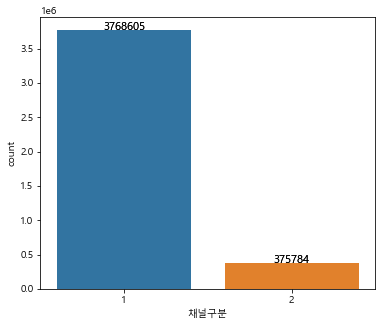

In [19]:
# 채널구분 확인
plt.figure(figsize=(6,5))
ax = sns.countplot(x='채널구분', data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 11)
plt.show()

- 오프라인 구매 : 3,768,605건 > 온라인 구매 : 375,784건

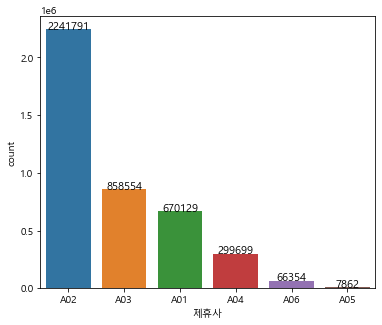

In [24]:
# 제휴사 확인
plt.figure(figsize=(6,5))
ax = sns.countplot(x='제휴사', data=df, order = df['제휴사'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 11)
plt.show()

- A02 : 2,241,791 > A03 : 858,554 > A01 : 670,129 > A04 : 299,699 > A06 : 66,354 > A05 : 7,862

- 채소 > 과자 > 대용식 > 유제품 > 냉장식품 > 음료 > 과일 > 축산물 > 테넌트/음식점 > 주류 > 조미료 > 냉동식품 > 청소/세탁/욕실 > 조리식품 > 수산물
- 대부분 식품, 추가로 청소 용품이 상위권

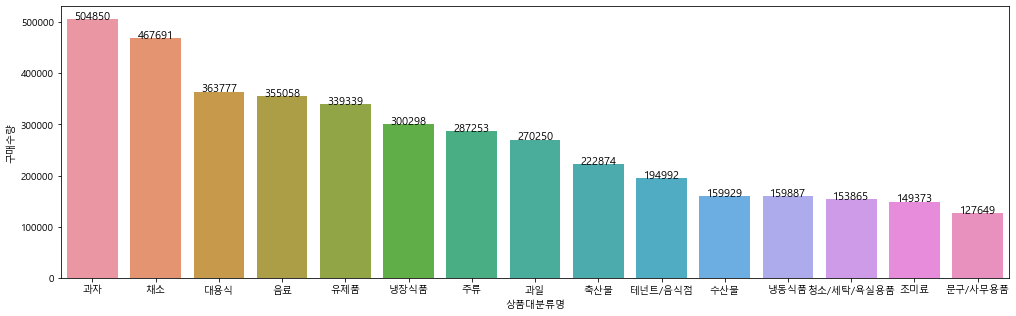

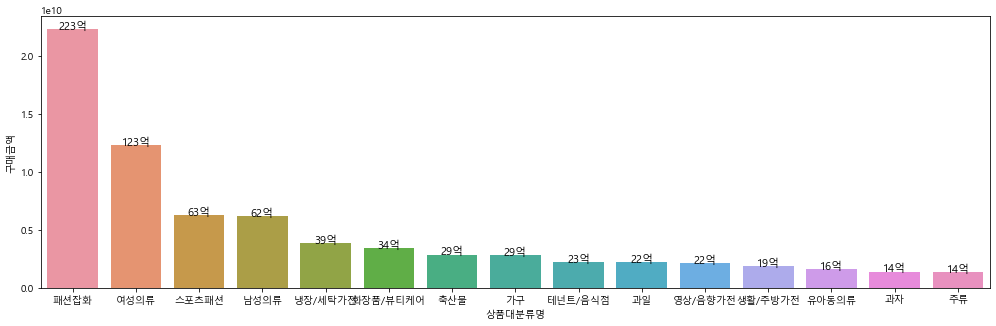

In [49]:
# 상품대분류명 상위 15위 확인
a = df[['상품대분류명', '구매금액', '구매수량']].groupby('상품대분류명').sum().sort_values('구매수량', ascending=False)
b = df[['상품대분류명', '구매금액', '구매수량']].groupby('상품대분류명').sum().sort_values('구매금액', ascending=False)

plt.figure(figsize=(17,5))
ax = sns.barplot(x=a[:15].index, y='구매수량', data=a[:15], ci=None)
for p in ax.patches:
    height = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 11)
plt.show()

plt.figure(figsize=(17,5))
ax = sns.barplot(x=b[:15].index, y='구매금액', data=b[:15], ci=None)
for p in ax.patches:
    height = p.get_height()
    h = round(int(p.get_height()), -8) / 100000000
    ax.text(p.get_x() + p.get_width() / 2., height + 3, str(int(h))+'억', ha = 'center', size = 11)
plt.show()

- 대분류별로 매출수량 상위 품목 : 대부분 식품
- 대분류별로 매출금액 상위 품목 : 의류

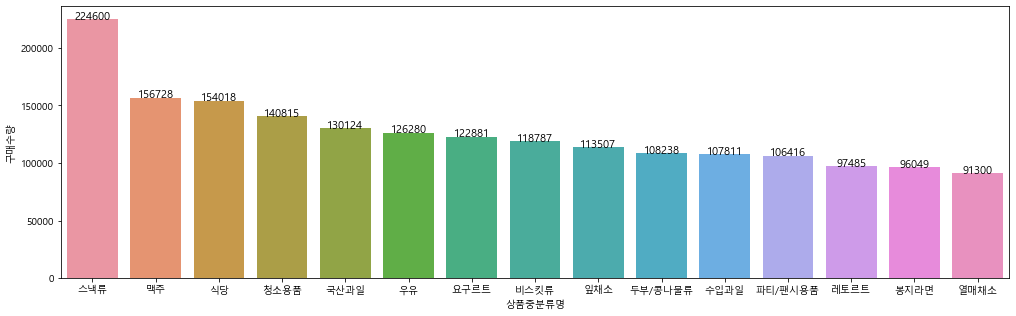

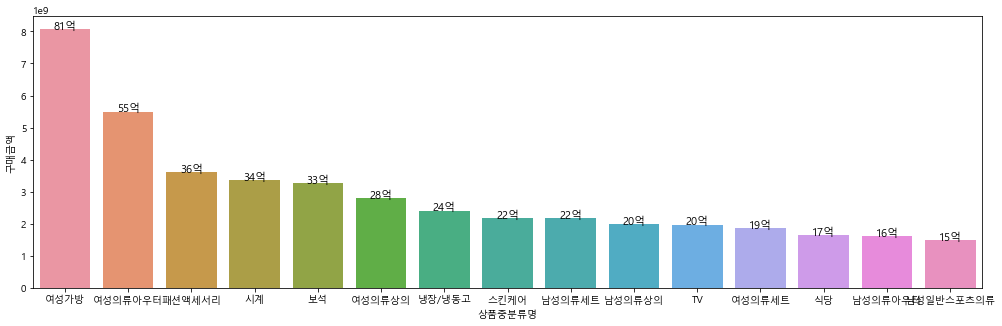

In [52]:
# 상품중분류명 상위 15위 확인
a = df[['상품중분류명', '구매금액', '구매수량']].groupby('상품중분류명').sum().sort_values('구매수량', ascending=False)
b = df[['상품중분류명', '구매금액', '구매수량']].groupby('상품중분류명').sum().sort_values('구매금액', ascending=False)

plt.figure(figsize=(17,5))
ax = sns.barplot(x=a[:15].index, y='구매수량', data=a[:15], ci=None)
for p in ax.patches:
    height = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 11)
plt.show()

plt.figure(figsize=(17,5))
ax = sns.barplot(x=b[:15].index, y='구매금액', data=b[:15], ci=None)
for p in ax.patches:
    height = p.get_height()
    h = round(int(p.get_height()), -8) / 100000000
    ax.text(p.get_x() + p.get_width() / 2., height + 3, str(int(h))+'억', ha = 'center', size = 11)
plt.show()

- 중분류별로 매출수량 상위 품목 : 대부분 식품
- 중분류별로 매출금액 상위 품목 : 의류 중에서도 여성 의류 + 악세서리

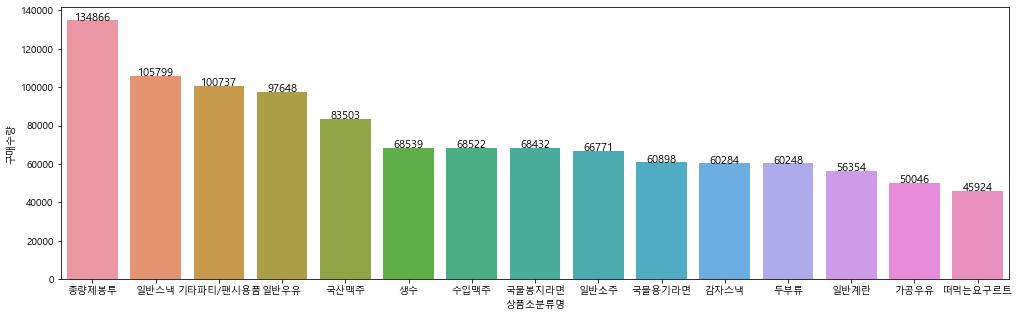

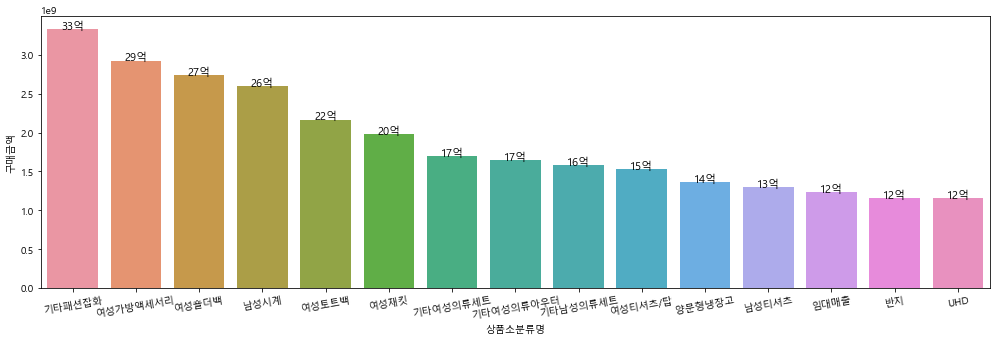

In [58]:
# 상품소분류명 상위 15위 확인
a = df[['상품소분류명', '구매금액', '구매수량']].groupby('상품소분류명').sum().sort_values('구매수량', ascending=False)
b = df[['상품소분류명', '구매금액', '구매수량']].groupby('상품소분류명').sum().sort_values('구매금액', ascending=False)

plt.figure(figsize=(17,5))
ax = sns.barplot(x=a[:15].index, y='구매수량', data=a[:15], ci=None)
for p in ax.patches:
    height = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 11)
plt.show()

plt.figure(figsize=(17,5))
ax = sns.barplot(x=b[:15].index, y='구매금액', data=b[:15], ci=None)
for p in ax.patches:
    height = p.get_height()
    h = round(int(p.get_height()), -8) / 100000000
    ax.text(p.get_x() + p.get_width() / 2., height + 3, str(int(h))+'억', ha = 'center', size = 11)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 10)
plt.show()

- 소분류별로 매출수량 상위 품목 : 종량제 봉투를 가장 상위 품목, 그 외 대부분 일반 스낵, 팬시용품도 상위권
- 소분류별로 매출금액 상위 품목 : 여성 패션 용품이 대부분, 남성은 시계가 상위 품목

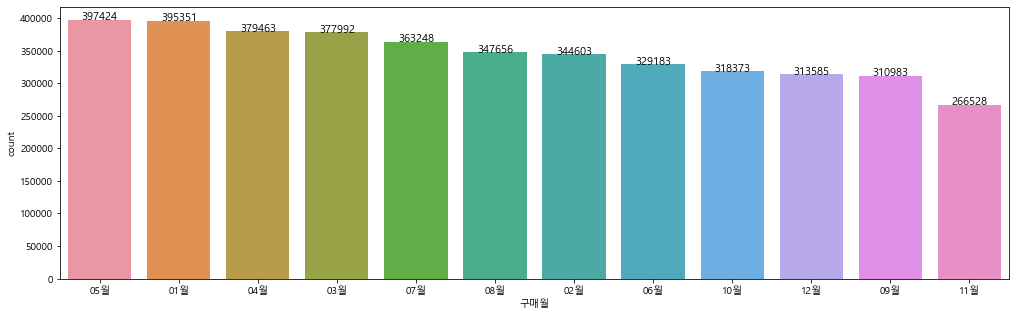

In [38]:
# 구매월
plt.figure(figsize=(17,5))
ax = sns.countplot(x='구매월', data=df, order = df['구매월'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 11)
plt.show()

- 5월 > 1월 > 4월 > 3월 > 7월 > 8월 > 2월 > 6월 > 10월 > 12월 > 9월 > 11월 : 주로 상반기에 많이 삼

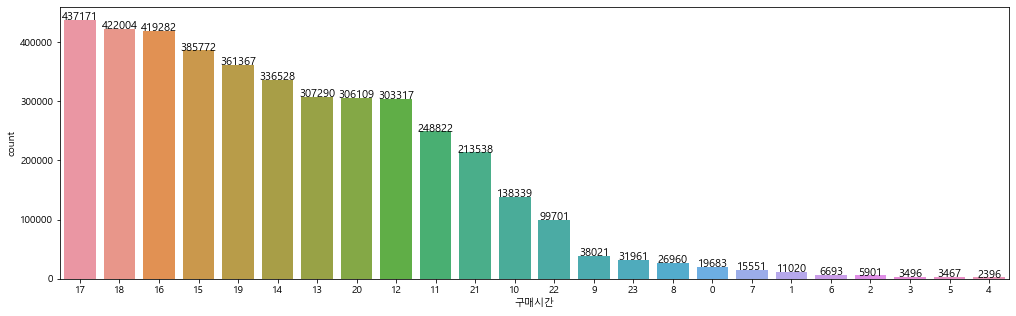

In [39]:
# 구매시간
plt.figure(figsize=(17,5))
ax = sns.countplot(x='구매시간', data=df, order = df['구매시간'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 11)
plt.show()

- 주로 오프라인 상점이 열려 있는 시간에 구매. 낮 ~ 저녁 시간대 대부분 구매

## 상품을 구매한 고객정보
### 군집화 위해서 고객정보별로 집계

In [59]:
# 고객번호만 중복되지 않게 추출
cust = list(df['고객번호'].unique())

In [60]:
ndf = pd.DataFrame({'고객번호' : cust})
ndf.head()

,고객번호
0,M000034966
1,M000136117
2,M000201112
3,M000225114
4,M000261625


In [61]:
# 성별 최빈값
ndf['성별'] = df.groupby('고객번호')['성별'].agg(**{'most_common_value':lambda x:x.mode()[0]}).reset_index()['most_common_value']

In [62]:
# 연령대 최빈값
ndf['연령대'] = df.groupby('고객번호')['연령대'].agg(**{'most_common_value':lambda x:x.mode()[0]}).reset_index()['most_common_value']

In [63]:
# 거주지 최빈값
ndf['거주지분류대코드'] = df.groupby('고객번호')['거주지분류대코드'].agg(**{'most_common_value':lambda x:x.mode()[0]}).reset_index()['most_common_value']

In [64]:
# 채널 최빈값
# 그룹핑하면서 categorical로 전환해주기
ndf['채널구분'] = df.groupby('고객번호')['채널구분'].agg(**{'most_common_value':lambda x:str(x.mode()[0])+'번'}).reset_index()['most_common_value']

In [65]:
# 제휴사 최빈값
ndf['제휴사'] = df.groupby('고객번호')['제휴사'].agg(**{'most_common_value':lambda x:x.mode()[0]}).reset_index()['most_common_value']

In [66]:
# 상품 최빈값
ndf['상품대분류명'] = df.groupby('고객번호')['상품대분류명'].agg(**{'most_common_value':lambda x:x.mode()[0]}).reset_index()['most_common_value']

In [67]:
# 구매시간 평균 
ndf['구매시간'] = df.groupby('고객번호')['구매시간'].agg(**{'mean':lambda x:int(round(x.mean(),0))}).reset_index()['mean']

In [68]:
# 구매금액 중앙값
ndf['구매금액'] = df.groupby('고객번호')['구매금액'].agg(**{'median':lambda x:int(round(x.median(),0))}).reset_index()['median']

In [69]:
# 구매수량 중앙값
ndf['구매수량'] = df.groupby('고객번호')['구매수량'].agg(**{'median':lambda x:int(round(x.median(),0))}).reset_index()['median']

In [70]:
# 구매월 최빈값
ndf['구매월'] = df.groupby('고객번호')['구매월'].agg(**{'most_common_value':lambda x:x.mode()[0]}).reset_index()['most_common_value']

In [71]:
ndf

,고객번호,성별,연령대,거주지분류대코드,채널구분,제휴사,상품대분류명,구매시간,구매금액,구매수량,구매월
0,M000034966,여성,40대,Z07,1번,A02,과자,17,4970,1,09월
1,M000136117,여성,30대,Z11,1번,A01,여성의류,15,53500,1,01월
2,M000201112,여성,50대,Z17,1번,A04,대용식,12,1700,1,07월
3,M000225114,여성,40대,Z17,1번,A01,과자,17,5500,1,04월
4,M000261625,여성,40대,Z17,1번,A01,화장품/뷰티케어,15,46500,1,07월
...,...,...,...,...,...,...,...,...,...,...,...
26912,M999599111,여성,40대,Z04,1번,A02,유제품,18,7230,1,04월
26913,M999673157,남성,30대,Z10,1번,A01,담배,14,5750,1,12월
26914,M999770689,여성,30대,Z16,1번,A04,조리식품,13,2300,1,02월
26915,M999849895,여성,20대,Z04,1번,A02,기타(비상품),16,7600,1,08월


In [254]:
ndf.to_csv('pdde_group_by_cust.csv', index=False)

### 상품을 구매한 고객정보 EDA

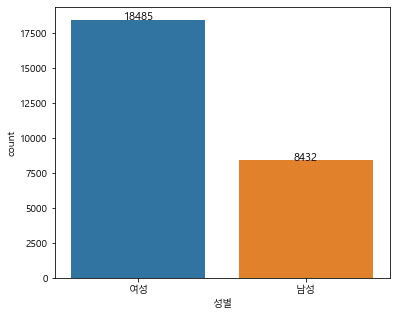

In [89]:
# 성별 확인
plt.figure(figsize=(6,5))
ax = sns.countplot(x='성별', data=ndf)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 11)
plt.show()

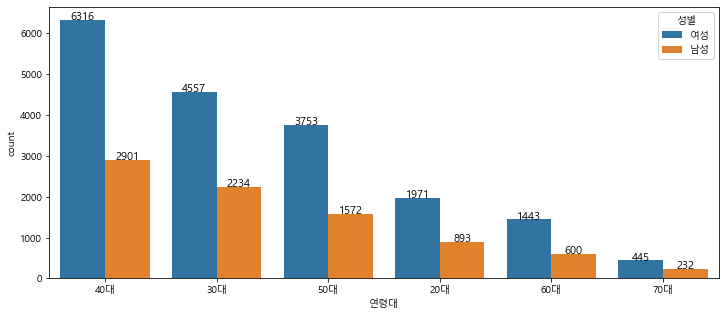

In [95]:
# 성별 + 연령대 확인
plt.figure(figsize=(12,5))
ax = sns.countplot(x='연령대', data=ndf, hue='성별', order = ndf['연령대'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 11)
plt.show()

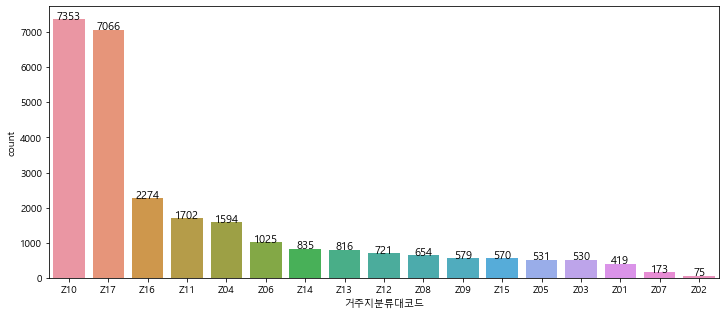

In [96]:
# 거주지분류대코드 + 연령대 확인
plt.figure(figsize=(12,5))
ax = sns.countplot(x='거주지분류대코드', data=ndf, order = ndf['거주지분류대코드'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 11)
plt.show()

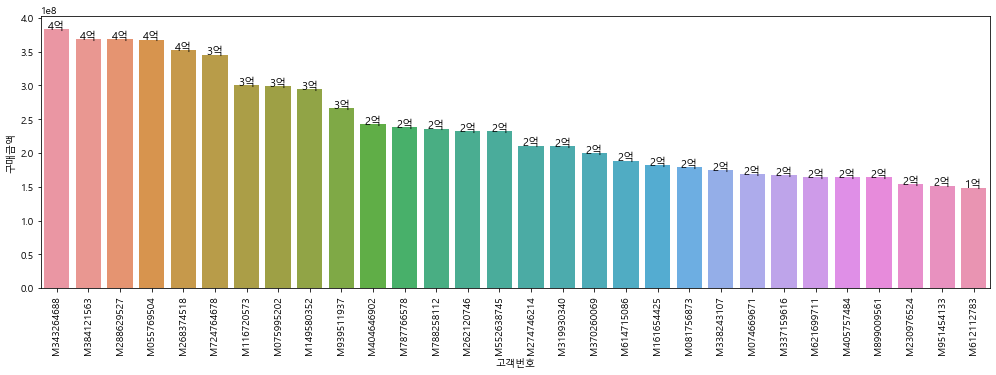

In [79]:
# 우수 고객 확인 상위 30위 - 매출액 기준
b = df[['고객번호', '구매금액']].groupby('고객번호').sum().sort_values('구매금액', ascending=False)

plt.figure(figsize=(17,5))
ax = sns.barplot(x=b[:30].index, y='구매금액', data=b[:30], ci=None)
for p in ax.patches:
    height = p.get_height()
    h = round(int(p.get_height()), -8) / 100000000
    ax.text(p.get_x() + p.get_width() / 2., height + 3, str(int(h))+'억', ha = 'center', size = 11)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [246]:
vip_df = df.copy().set_index('고객번호') # 40만개 테이블 고객번호를 인덱스 만들어주기

In [247]:
# 상위 100명 고객이 주로 구매하는 품목 
# 고객번호 추출 -> 40만개 테이블 해당 고객번호만 가져오기
# 군집 1 고객번호만 40만개 테이블에서 찾아야쥐
vips = df[['고객번호', '구매금액']].groupby('고객번호').sum().sort_values('구매금액', ascending=False)[:100].index

In [248]:
vip = vip_df.loc[vips]

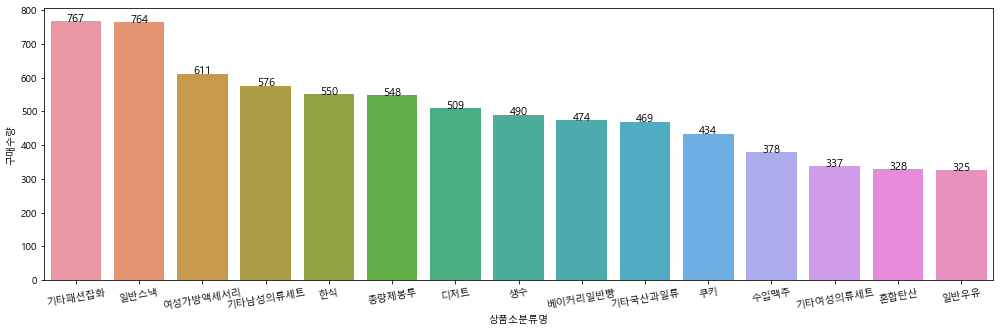

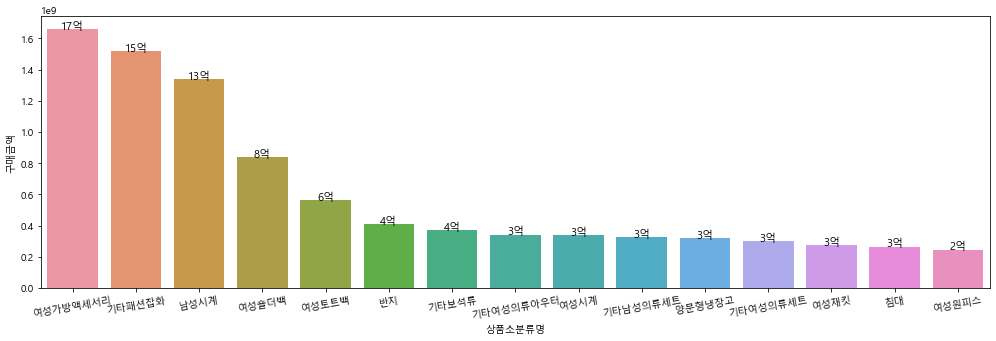

In [253]:
# 상품소분류명 상위 15위 확인
a = vip[['상품소분류명', '구매금액', '구매수량']].groupby('상품소분류명').sum().sort_values('구매수량', ascending=False)
b = vip[['상품소분류명', '구매금액', '구매수량']].groupby('상품소분류명').sum().sort_values('구매금액', ascending=False)

plt.figure(figsize=(17,5))
ax = sns.barplot(x=a[:15].index, y='구매수량', data=a[:15], ci=None)
for p in ax.patches:
    height = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha = 'center', size = 11)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 10)
plt.show()

plt.figure(figsize=(17,5))
ax = sns.barplot(x=b[:15].index, y='구매금액', data=b[:15], ci=None)
for p in ax.patches:
    height = p.get_height()
    h = round(int(p.get_height()), -8) / 100000000
    ax.text(p.get_x() + p.get_width() / 2., height + 3, str(int(h))+'억', ha = 'center', size = 11)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 10)
plt.show()

In [254]:
# vip 고객정보 EDA
vip_ndf = ndf.copy().set_index('고객번호')

In [216]:
d = ndf[ndf['고객번호'] == vips[0]]
vips.remove(vips[0])

In [255]:
vip = vip_ndf.loc[vips]

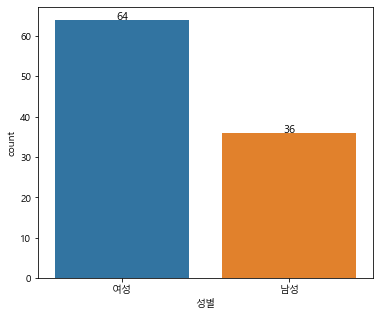

In [267]:
# 성별 확인
plt.figure(figsize=(6,5))
ax = sns.countplot(x='성별', data=vip, order = vip['성별'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha = 'center', size = 11)
plt.show()

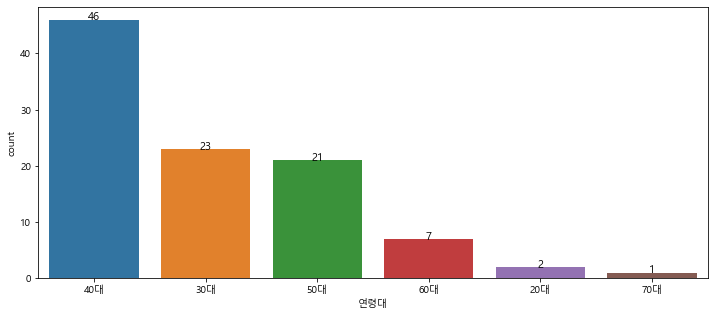

In [274]:
# 성별 + 연령대 확인
plt.figure(figsize=(12,5))
ax = sns.countplot(x='연령대', data=vip, order = vip['연령대'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha = 'center', size = 11)
plt.show()

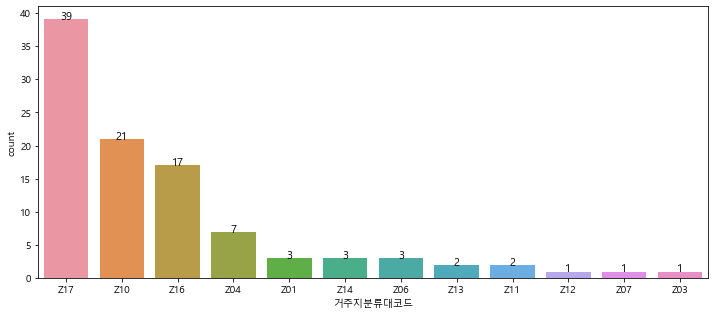

In [269]:
# 거주지분류대코드 + 연령대 확인
plt.figure(figsize=(12,5))
ax = sns.countplot(x='거주지분류대코드', data=vip, order = vip['거주지분류대코드'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha = 'center', size = 11)
plt.show()